## **DSCI100 Project Final Report**

**Authors:**

         Coco Zhang:       37174042
	     Rebecca Philip:   25939645
         Rachel Yu:        22710321
         Amber Facher:     56306723 

**Github Repository**: https://github.com/beccaphilip/DSCI-100-Group-Project


This project will use 1 of the 2 datasets provided by a UBC research group:

- `players.csv` contains a list of all unique players, including data about each player.

Data was collected through an open, free, and public Minecraft server where all players are verified users as they must register themselves and sign a consent form to get the link to play. There have been over 10,000 players and recorded hours, but the provided datasets contain much fewer numbers.

The `players.csv` dataset has 196 observations and 7 variables, where each row represents a different player. The variables include:

- `experience`, categorical variable that describes the player's level.
- `subscribe`, logical varibale which indicates if the player is subscribed to a game-related newsletter.
- `hashedEmail`, character variable of a unique code for each player generated from their personal email.
- `played_hours`, numeric variable of the number of hours a player spent on the server.
- `name`, character variable of the player's first name.
- `gender`, categorical variable of the player's gender.
- `Age`, numeric variable of the player's age.


**Broad Question:**

Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how to these features differ between various player types?

**Specific Question:**

"To what extent do player age and total gameplay hours serve as predictors of newsletter subscription status?" 

(Can `Age` and `played_hours` predict `subscribe` from the `players` dataset?)

**Why We Chose These Predictor Variables:**

We selected *player age* and *total played hours* because they are both meaningful factors that could have potential relationships with newsletter subscription. They share aspects of player behaviour and characteristics that align directly with both our broad and specific questions.

- `Age` represents demographic differences beween players. Since our broad question asks which *player characteristics* relate to newsletter subscription, age is a fundamental factor. Different age groups may interact differently with gaming content and communications, which could affect their likelihood of subscribing.
- `played_hours` reflects how engaged a player is with the game. This variable connects to the behavioural component of our question: more active or interested players may be more inclined to subscribe to stay updated and connected with the game.

Using both of these predictors, we can determine whether demographic factors (age) and engagement levels (played hours) help predict whether or which players subscribe to the newsletter.

Below, we will begin the exploratory data analysis for our question. 

To start, we will load the necessary packages, wrangle the data by checking for and handling missing values, and ensure the categorical variables are in a form ready for analysis.

In [3]:
#Load packages
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [4]:
#Read in data
players <- read_csv("players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


**Tidying the Data**

From printing the head, we notice that the data is already relatively tidy: each row is a single observation, each column is a single variable, and each value is a single cell. 

The only wrangling we must do is to ensure the character variables are factors. This is done to certify they are considered categorical data for the rest of our analysis. 

In [5]:
#Tidy the dataset by changing character variables into factor columns for categorical analysis

players_tidy <- players|>
    mutate(experience = as_factor(experience), 
           gender = as_factor(gender), 
           subscribe = as_factor(subscribe))

#Look at player characteristics with summary function

players_summary <- summary(players_tidy)
players_summary

    experience subscribe   hashedEmail         played_hours    
 Pro     :14   FALSE: 52   Length:196         Min.   :  0.000  
 Veteran :48   TRUE :144   Class :character   1st Qu.:  0.000  
 Amateur :63               Mode  :character   Median :  0.100  
 Regular :36                                  Mean   :  5.846  
 Beginner:35                                  3rd Qu.:  0.600  
                                              Max.   :223.100  
                                                               
     name                         gender         Age       
 Length:196         Male             :124   Min.   : 9.00  
 Class :character   Female           : 37   1st Qu.:17.00  
 Mode  :character   Non-binary       : 15   Median :19.00  
                    Prefer not to say: 11   Mean   :21.14  
                    Agender          :  2   3rd Qu.:22.75  
                    Two-Spirited     :  6   Max.   :58.00  
                    Other            :  1   NA's   :2      

**Summary Statistics Insights:**

From the `players` dataset, the average age is 21.14 years, and players spend an average of 5.85 hours on the server. Most players (73%) are subscribed to a gaming-related newsletter, and majority identify as a male (63%). The majority experience level is Amateur (32%).

**Potential Issues in the Data:**

- In `subscribe`, there is a class imbalance (144 TRUE vs 52 FALSE). We can handle this by reporting other metrics like precision or recall, or by rebalancing the data by oversampling the rare class.
- In `played_hours`, the values are highly skewed. There are many zero's, representing players who did not play or played very little time. There are also some extreme values, like 223 hours played.
- In `Age`, there are 2 NA values. We can handle this by removing them, since there are only 2.


**Player Characteristics**
|Total Players|Experience Level|Players|Gender|Players|Subscribed|Players|Age Range|Years|Total Played Time|Hours|
|-------------|----------------|-------|------|-------|----------|-------|---------|-----|---------------|-----|
|196|Pro|14|Male|124|Yes|144|Minimum Age|9|Minimum Hours|0.00|
| |Veteren|48|Female|37|No|52|1st Quartile|17.00|1st Quartile|0.00|
| |Amateur|63|Non-binary|15| | |Median Age|19|Median Hours|0.10|
| |Regular|36|Prefer not to say|11| | |Mean Age|21.14|Mean Hours|5.85|
| |Beginner|35|Agender|2| | |3rd Quartile|22.75|3rd Quartile|0.60|
| |        |   |Two_spirited|6| | |Maximum Age|58|Maximum Hours|223.10|
| |        |   |Other|1| | | | | | |

In [4]:
#Create table for mean age and played hours from players_tidy
players_means <- summarise(players_tidy, mean_age = round(mean(Age, na.rm = TRUE), 2), 
                           mean_played_hours = round(mean(played_hours), 2))
players_means

mean_age,mean_played_hours
<dbl>,<dbl>
21.14,5.85


In [5]:
#Remove the NA values from Age
players_tidy <- players_tidy |>
    filter(!is.na(Age))

#Calculate mean playing hours for each age
age_mean <- players_tidy |>
  group_by(Age)|>
  summarize(mean_playing_hours = mean(played_hours))

age_mean

Age,mean_playing_hours
<dbl>,<dbl>
9,30.3000000
10,3.6000000
11,2.9000000
12,0.5000000
14,8.7000000
15,0.1000000
16,50.0333333
17,4.8863014
18,0.2285714


**Exploratory Visualizations of the Dataset**

To better understand the factors that could influence subscription to the newsletter, we will visualize some variables and our predictors below. This will help us identify any patterns that could be relevant for our planned analysis.

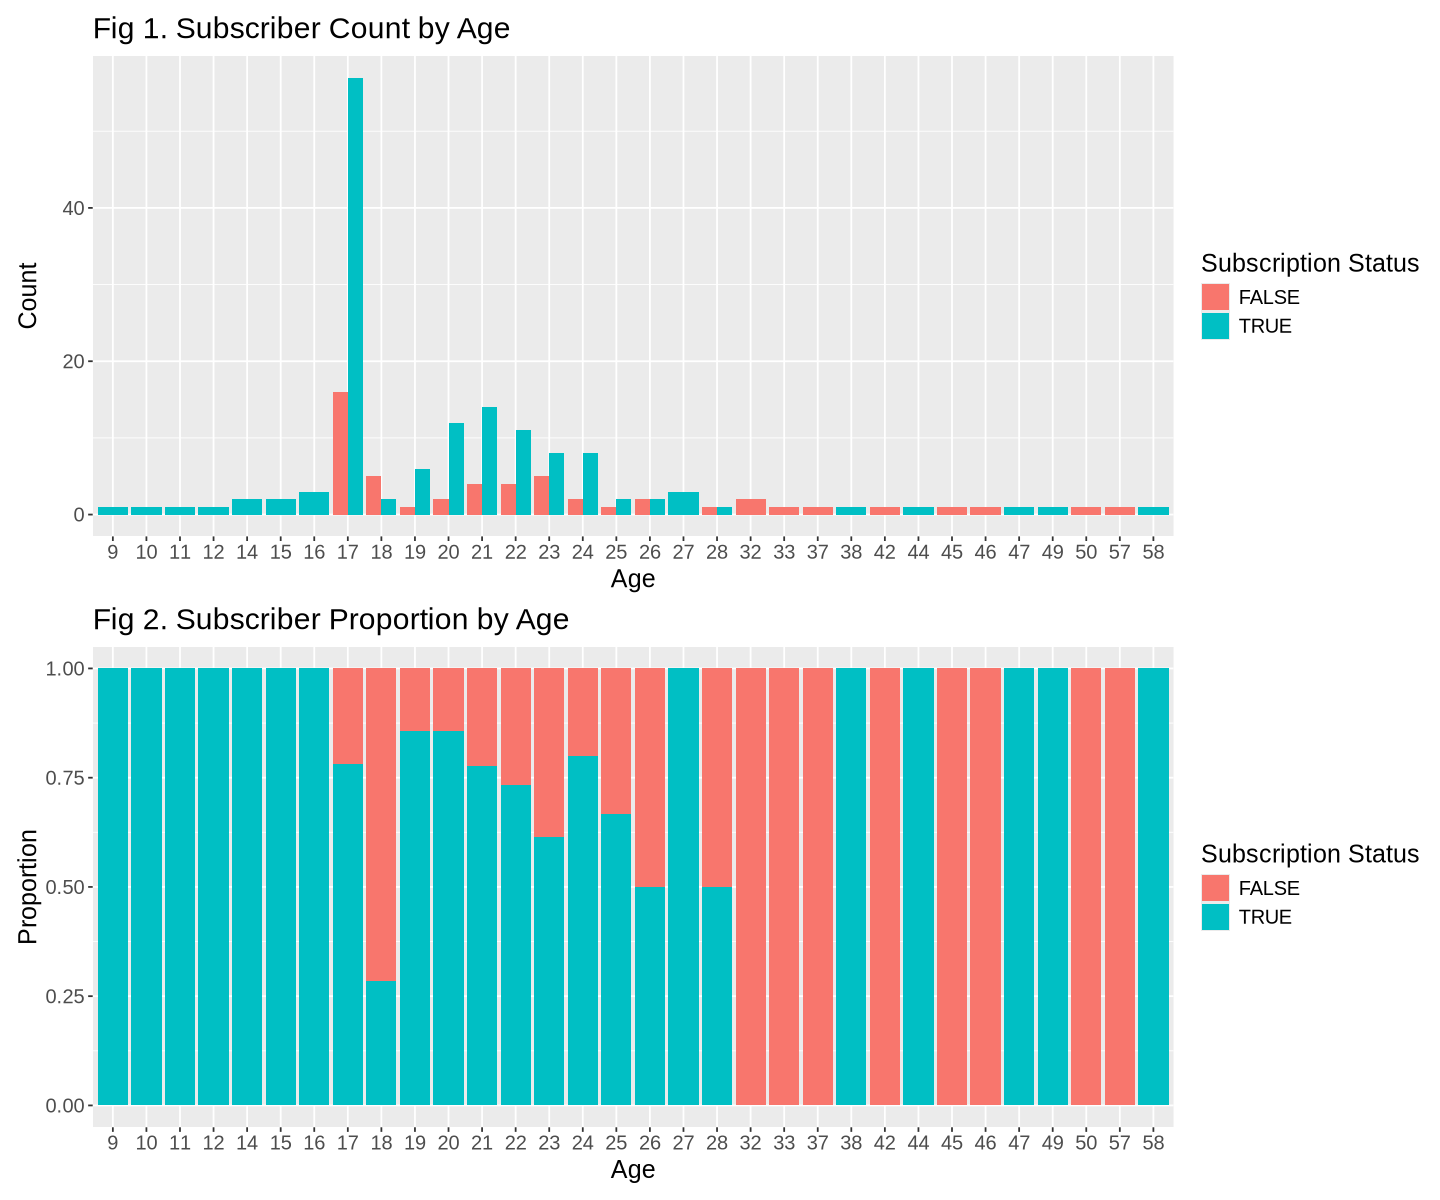

In [27]:
# Predictor (age) vs Response (subscribe) variable plot
options(repr.plot.height = 10, repr.plot.width = 12)

# Count plot
subscribe_plot_age_count <- ggplot(players_tidy, aes(x = factor(Age), fill = subscribe)) +
    geom_bar(position = "dodge") +
    labs(
        title = "Fig 1. Subscriber Count by Age",
        x = "Age",
        y = "Count",
        fill = "Subscription Status") +
    theme(text = element_text(size = 15))

# Proportion plot
subscribe_plot_age_prop <- ggplot(players_tidy, aes(x = factor(Age), fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(
        title = "Fig 2. Subscriber Proportion by Age",
        x = "Age",
        y = "Proportion",
        fill = "Subscription Status") +
    theme(text = element_text(size = 15))


subscribe_plot_age_count / subscribe_plot_age_prop

**Visualization Takeaways**

- From Figure 1, the highest total subscriber count occurs from the late teens to mid-twenties. There is a sharp increase in subscribers at age 17, with another cluster around the early to mid twenties. After this, the count of subscribers drops.
- From Figure 2, majority of ages up till 28 are subscribed to the newsletter. At age 18 there is a spike in non-subscribers, and at age 27, there is a spike in subscribers where all players at this age are subscribed. After age 28, there is a drop in subscriber proportion.

From the Predictor (age) vs Response (subscribe) variable plots, we now understand that the largest subscriber base is in the 17-24 age range. Subscribers drop after age 30.

Warning message:
“Removed 120 rows containing missing values or values outside the scale range
(`geom_bar()`).”


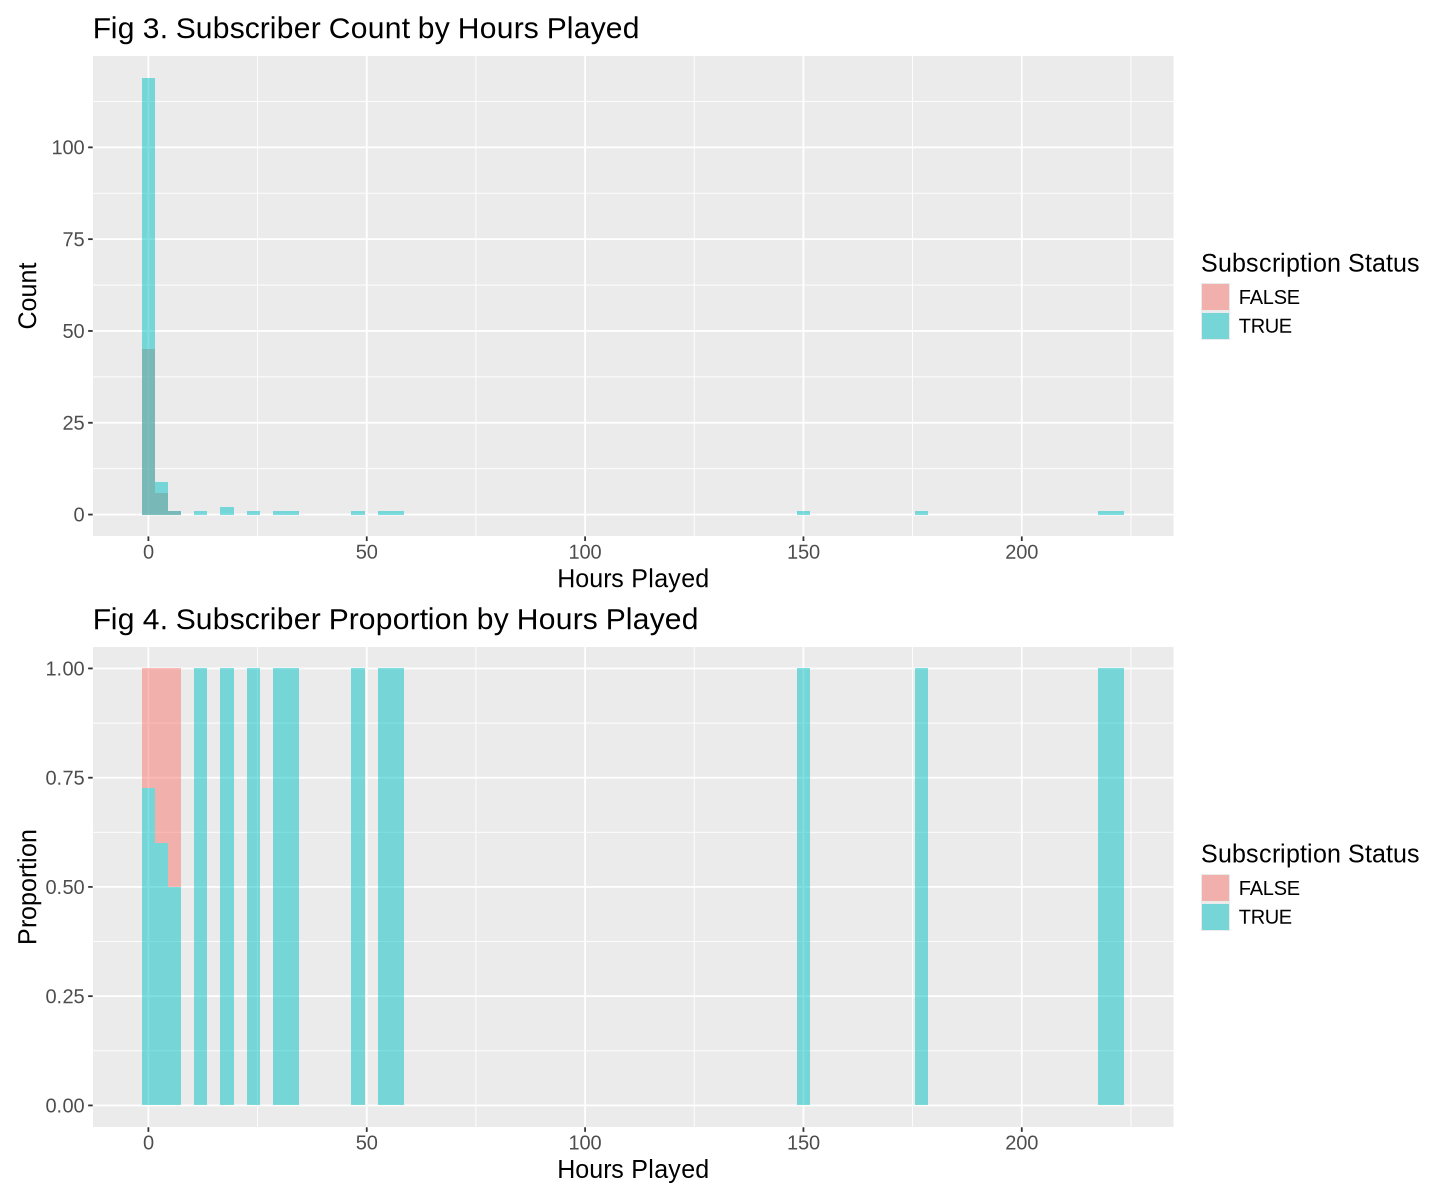

In [28]:
# Subscription across played hour values
options(repr.plot.height = 10, repr.plot.width = 12)

# Count histogram
subscribe_plot_hours_count <- players_tidy |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram(alpha = 0.5, position = "identity", binwidth = 3) +
    labs(
        title = "Fig 3. Subscriber Count by Hours Played",
        x = "Hours Played",
        y = "Count",
        fill = "Subscription Status") +
    theme(text=element_text(size = 15))

subscribe_plot_hours_prop <- players_tidy |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram(alpha = 0.5, position = "fill", binwidth = 3) +
    labs(
        title = "Fig 4. Subscriber Proportion by Hours Played",
        x = "Hours Played",
        y = "Proportion",
        fill = "Subscription Status") +
    theme(text=element_text(size = 15))

subscribe_plot_hours_count / subscribe_plot_hours_prop

**Visualization Takeaways**

- From Figure 3, there is a high concentration of players at or around the 0 playing hours mark for both subscribers and non-subscribers. After this, player count drops.
- From Figure 4, around the 0 hour mark, about 50-70% of players are subscribers. For all other hours, the proportion is 100% subscribed.

This plot shows us that many players in the data set have 0 playing hours; this was also seen in our data summary that showed median playing hours = 0.1, where the mean hours = 5.8 was likely influenced by a couple of high play hour outliers. Despite a lack of playing, we can see in this plot that more of the 0 hour players still subscribed to the newsletter. Thus we are going to compare two versions of the data set for our classification model, one that includes the 0 hour players, and one with those player excluded. 

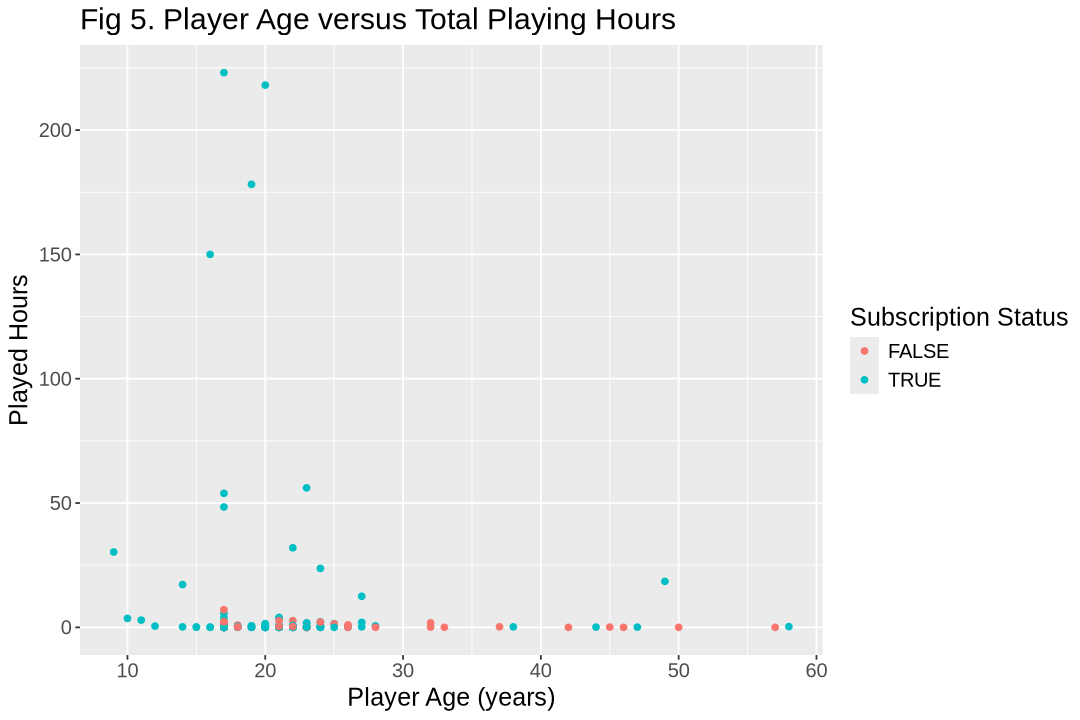

In [34]:
# Plot each combination of predictor variables to look for relationships
options(repr.plot.height=6, repr.plot.width=9)

age_hours_plot <- players_tidy |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point() + 
    labs(x = "Player Age (years)", 
         y = "Played Hours", 
         color = "Subscription Status") +
    ggtitle("Fig 5. Player Age versus Total Playing Hours")+
    theme(text = element_text(size = 15))

age_hours_plot

**Visualization Takeaways**

Figure 5 shows that most subscribed players are in the younger half of the overall age distribution, though there are only a few players with played hours above 50. As we lack any players above the age of 30 who play more than 25 hours, the predictive capability of the model may not be very strong for new unlabelled data in the older and higher played hours ranges. 

**Predicting Newsletter Subscription**

In the sections below, we will build our model to predict whether a player subscribes to a game-related newsletter based on their age and total played hours. We will tune and train a K-nearest neighbours (KNN) classifier.

**Classifier Including All Players (0 Hour Players Included)**

In the model below, we will include all players, even those who logged zero or very few hours. By doing this, we can use age and total played hours to predict newsletter subscription across the entire player base. 

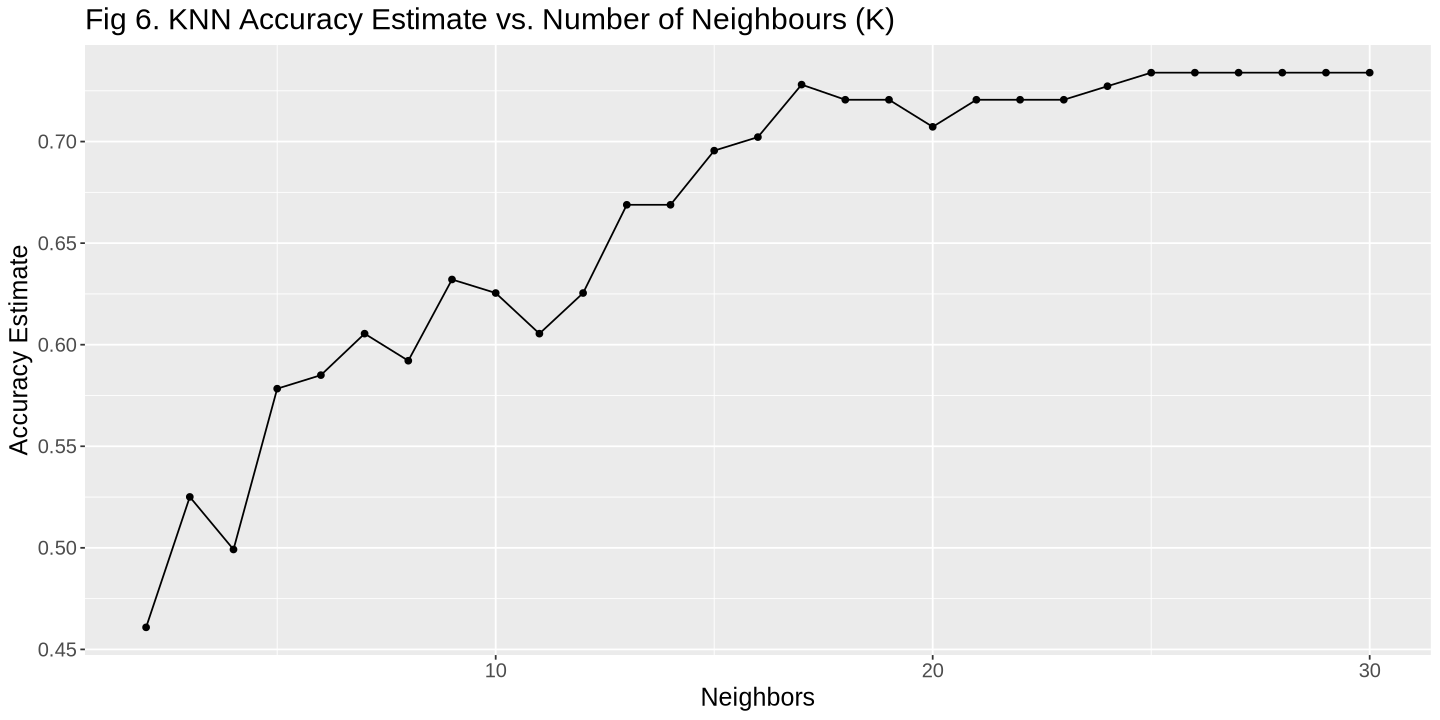

In [37]:
#Begin Tuning Classifier to Determine Best K value
set.seed(1)
options(repr.plot.height=6, repr.plot.width=12)

players_split <- initial_split(players_tidy, prop = 0.8,strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

players_recipe <- recipe(subscribe~Age+played_hours, data = players_train)|>
step_impute_mean(all_numeric_predictors()) |>
step_scale(all_predictors())|>
step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

vfold <- vfold_cv(players_train, v = 10, strata = subscribe)

metrics <- workflow() |>
            add_recipe(players_recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = vfold, grid = tibble(neighbors = seq(from=2, to=30, by=1))) |>
            collect_metrics()

accuracy <- metrics |>
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracy, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', 
                       y = 'Accuracy Estimate',
                      title = "Fig 6. KNN Accuracy Estimate vs. Number of Neighbours (K)") +
                  theme(text = element_text(size = 15)) 

cross_val_plot

**Best K-value for KNN**

From Figure 6, we can see that K = 21 has the best accuracy. At this point, the model has an accuracy of approximately 0.72.

In [10]:
#Run the tuned model against the test data to find true accuracy and confusion matrix
tuned_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 21) |>
       set_engine("kknn") |>
       set_mode("classification")

tuned_fit <- workflow() |>
             add_recipe(players_recipe) |>
             add_model(tuned_spec) |>
            fit(data = players_train)

players_predictions <- predict(tuned_fit, players_test) |>
                        bind_cols(players_test)

tuned_metrics <- players_predictions |> metrics(truth = subscribe, estimate = .pred_class)

players_conf_mat <- players_predictions |>
                        conf_mat(truth = subscribe, estimate = .pred_class) 
tuned_metrics
players_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.72500000
kap,binary,0.07563025


          Truth
Prediction FALSE TRUE
     FALSE     1    1
     TRUE     10   28

**Metrics**

From these calculations we can see that including 0 hour players and using k = 21 gives us an accuracy of 72.5% on the test data, precision of 73.7%, and recall of 96.6%.

**Classifier Excluding 0 Hour Players**

Below, we will tune another classifier model with the exclusion of 0 hour players. By doing this, we can focus only on active players and use their data to help us examine whether age and total played hours can predict newsletter subscription.

In [11]:
#Create separate data set excluding 0 hour players
players_no_zero <- players_tidy |>
    filter(played_hours != 0)
players_no_zero

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25
Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
Amateur,TRUE,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17


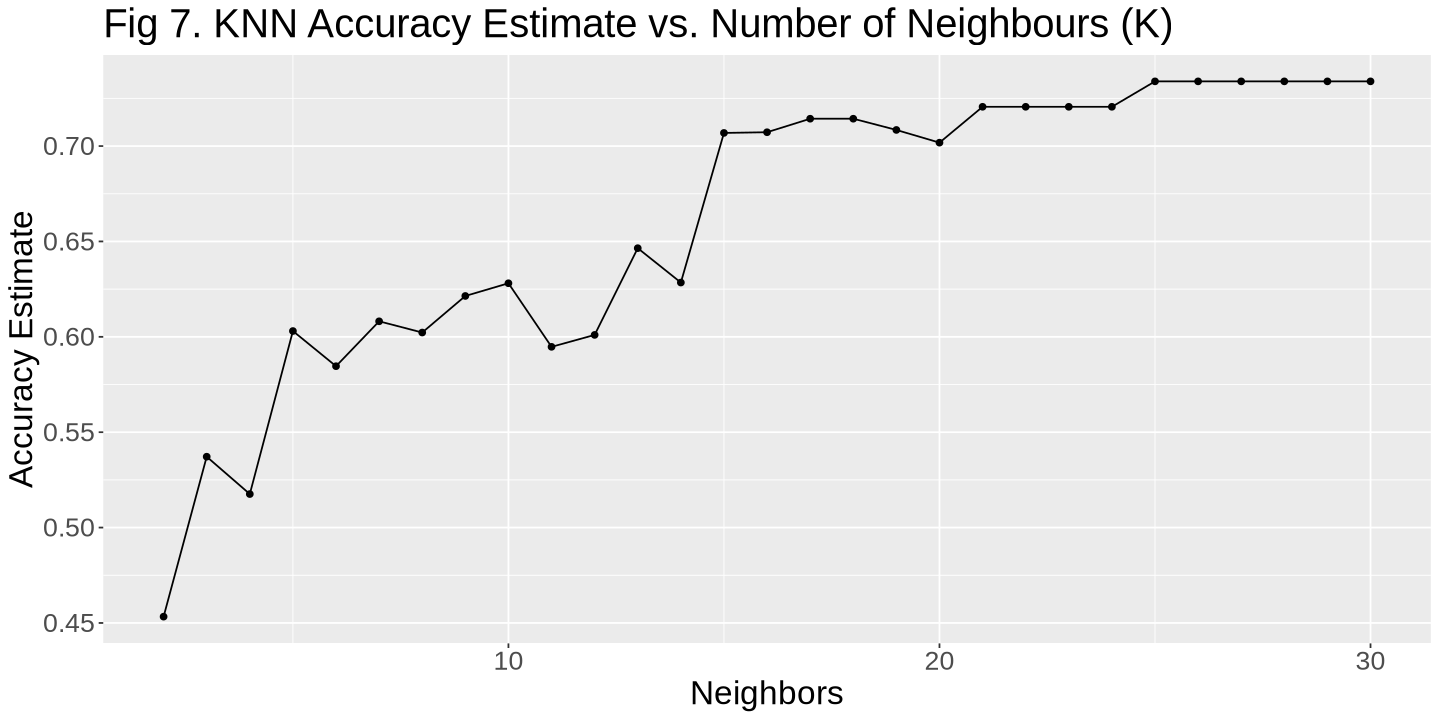

In [38]:
#Tune a new classifer for the exclusion data set
set.seed(1)
options(repr.plot.height=6, repr.plot.width=12)

players_resplit <- initial_split(players_no_zero, prop = 0.8,strata = subscribe)
players_retrain <- training(players_resplit)
players_retest <- testing(players_resplit)

players_new_recipe <- recipe(subscribe~Age+played_hours, data = players_retrain)|>
step_impute_mean(all_numeric_predictors()) |>
step_scale(all_predictors())|>
step_center(all_predictors())

knn_new_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

new_vfold <- vfold_cv(players_train, v = 10, strata = subscribe)

new_metrics <- workflow() |>
            add_recipe(players_new_recipe) |>
            add_model(knn_new_spec) |>
            tune_grid(resamples = new_vfold, grid = tibble(neighbors = seq(from=2, to=30, by=1))) |>
            collect_metrics()

new_accuracy <- new_metrics |>
                 filter(.metric == 'accuracy')

new_crossval_plot <- ggplot(new_accuracy, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', 
                       y = 'Accuracy Estimate',
                      title = "Fig 7. KNN Accuracy Estimate vs. Number of Neighbours (K)") +
                  theme(text = element_text(size = 20)) 

new_crossval_plot

**Best K-value for KNN**

From this plot, k = 22 and k = 24 have about the same accuracy, so we will choose k = 22 as our data set was fairly small in the first place.

In [13]:
#Run the exclusion tuned model against the exclusion tuned data to compare accuracy to first model
new_tuned_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 22) |>
       set_engine("kknn") |>
       set_mode("classification")

new_tuned_fit <- workflow() |>
             add_recipe(players_new_recipe) |>
             add_model(new_tuned_spec) |>
            fit(data = players_retrain)

new_players_predictions <- predict(new_tuned_fit, players_retest) |>
                        bind_cols(players_retest)

new_tuned_metrics <- new_players_predictions |> metrics(truth = subscribe, estimate = .pred_class)

new_players_conf_mat <- new_players_predictions |>
                        conf_mat(truth = subscribe, estimate = .pred_class) 
new_tuned_metrics
new_players_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7727273
kap,binary,0.0000000


          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE      5   17

**Metrics**

By using k = 22, we've got an accuracy of 78.2%. However, it predicts everyone as subscribed which shows the limit of the prediction model.

# **Discussion**


**Summary**

Referring back to our original questions:

*Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how to these features differ between various player types?*

*Specific Question: "To what extent do player age and total gameplay hours serve as predictors of newsletter subscription status?"* 

*(Can `Age` and `played_hours` predict `subscribe` from the `players` dataset?)*

Our analysis explored whether `age` and `played_hours` could meaningfully predict which players subscribed to the game-related newsletter. The exploratory visualizations showed two consistent patterns. First, most subscribers fell between the ages of **17** and **24** with a decline past the late twenties. Second, a substantial amount of players recorded **0 hours** of gameplay, however many of them still remained subscribed. 

When using the K-nearest neighbours test (KNN), the model including all players reached an accuracy of 72.5% with a recall of 96.6%. When the model excluded zero-hour players, the model reached a higher nominal accuracy of 78.2%. However, this is as a result of only predicting all players as subscribers. The improvement in the second test is a result of data being skewed towards one outcome, reflecting an underlying **class imbalance** and not a better predictive relationship. 

Overall, the relationship between these predictors and subscription exists, but it is too weak to support reliable classification. Subscription behaviour in this dataset is clearly influenced by factors beyond `age` and `played_hours`.

**Expectations vs Result**

The findings were partially consistent with our expectations. It made intuitive sense that players who invest more time in the servers would be more willing to subscribe, and throughout our analysis, we did see a trend that supported this theory. However, the presence of many zero-hour players with a subscription challenged this assumption. From this anomaly, it is very likely that subscription is not purely a behaviour indicator of in-game engagement. There may be many external factors, such as off-server communication, personal curiosity, and other factors that have not been considered. 

From our analysis between the relationship of age and subscription status, we also expected to a correlation. However, despite the younger demographic having higher subscriber rates, this pattern was not distinctive enough to yield predictive performance. It was difficult to seperate non-subscribers from subscribers from age alone. 

Therefore, while broad trends matched our expectations, the quantitative results showed that `age` and `played_hours` were not sufficient predictors on their own.

**Impact of Findings**

From our findings, we can have a broader understanding of digital engagement and its impacts. First, the imbalance of the response variable strongly influenced model behaviour. When a model sees far more subscribers than non-subscribers, it will naturally gravitate towards majority-class predictions. This issue highlights the need for strategies like rebalancing or alternative evaluation metrics. 

Second, the large number of zero-hour players that have a subscription indicates that subscription may be tied to motivations outside of gameplay. For instance, it is possible players subscribed when they signed-up or simply forgot about their subscription, therefore raw gameplay statistics cannot fully justify subscription patterns. 

Third, the model's ability to generalize is limited by the sparsity of data in specific regions, such as older players or those with higher playtime. With only a small number of players above thirty and very few logging high-playtime, the model simply does not have enough examples to reliably learn the patterns in these specific ranges. 

To summarize, the results from our findings indicate that `age` and `played_hours` are not the sole predictors for subscription, and there are likely more multi-dimensional behaviours that influence subscription. 

**Future Questions**

The limitations in our current analysis can guide us towards several deeper questions for future uses. For instance, how would the inclusion of additional variables affect subscription status? 

Another question that can arise is from the high subscription rate among inactive players; what drives individuals who have zero-hours of playing time to subscribe to a game? Do they interact with the online community or do they have a stronger presence outside the servers? 

Methodologically, we can also question future methodologies to assess this data. Would alternative modelling approaches work? Is there a better way to tidy and sort the given data? If so, how would the relationships be affected? 

In short, our analysis have answered our broad and specific question, and at the same time, it also opened the door to a larger range of questions for future analysis. 